#Introduction

The aim of this project to figure out whether an emergency exists or not by analyzing one's tweet.

##Import libraries and Kaggle API

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
stopWord = set(stopwords.words('english'))

import re
import string

import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.1MB 249kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#Get dataset from Kaggle
#Colab library to upload files to notebook
from google.colab import files

In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
#Install Kaggle
!pip install -q kaggle
!pip install -q kaggle-cli

kaggle.json
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 5.3MB 7.3MB/s 
     |████████████████████████████████| 133kB 52.6MB/s 
     |████████████████████████████████| 112kB 56.2MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 


In [ ]:
#Download the dataset
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 54.4MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 20.3MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 137MB/s]


In [ ]:
#Show files
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
trainDF = pd.DataFrame(train)
testDF = pd.DataFrame(test)

In [ ]:
trainDF

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


#Exploratory Data Analysis (EDA)

##Real tweets or not

In [ ]:
#tweet[tweet['target'] == 1].shape[0]
realTweets = trainDF[trainDF['target'] == 1].shape[0]
nRealTweets = trainDF[trainDF['target'] == 0].shape[0]

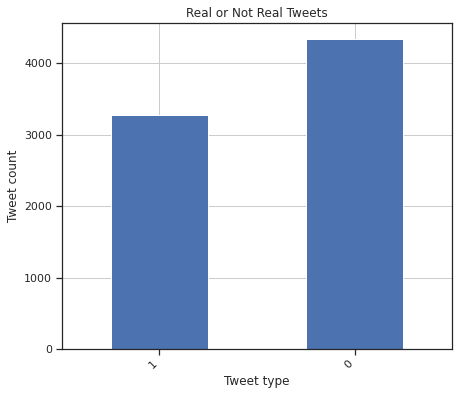

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.set()
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})
sns.axes_style("whitegrid") 
plot = trainDF.groupby('target').count()['id'].sort_values().plot(kind= 'bar', title = 'Real or Not Real Tweets', figsize =(7,6))
plt.grid(b=True)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Tweet count')
plt.xlabel('Tweet type')
plt.show()
plot.figure.savefig('RealorNotReal.pdf')
files.download('RealorNotReal.pdf')

In the graph above, 1 (diaster) stands for real tweets, whereas 0 (not a disaster) stands for fake tweets. As expected, most of the tweets don't relate to disasters in this dataset.

##Length of tweets

In [ ]:
trainDF['length'] = trainDF['text'].str.len()

In [ ]:
trainDF

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


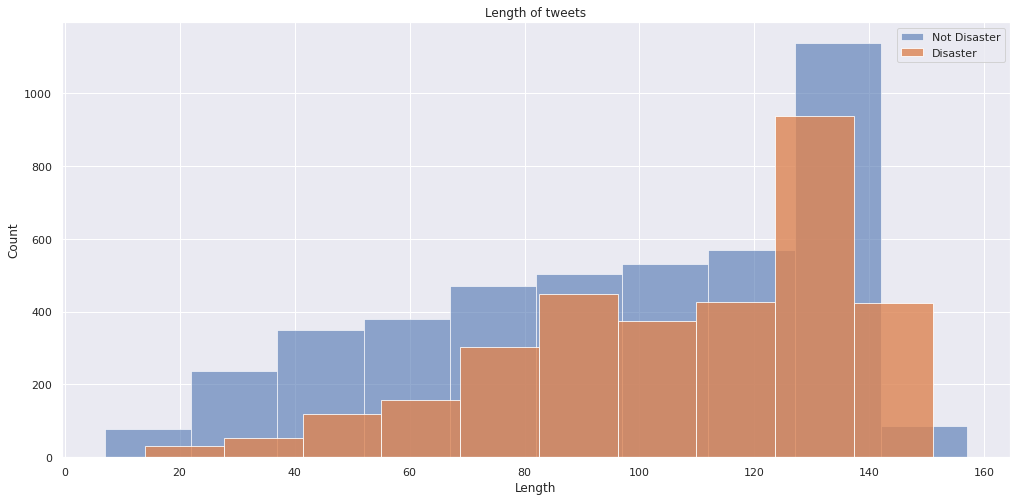

In [ ]:
sns.set()
pd.options.plotting.backend = "plotly"

plt.figure(figsize=(17,8))
plt.hist(trainDF[trainDF['target'] == 0]['length'], alpha = 0.6, label='Not Disaster')
plt.hist(trainDF[trainDF['target'] == 1]['length'], alpha = 0.8, label='Disaster')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length of tweets')
plt.legend(loc='upper right')
plt.show()

##Characters in tweets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

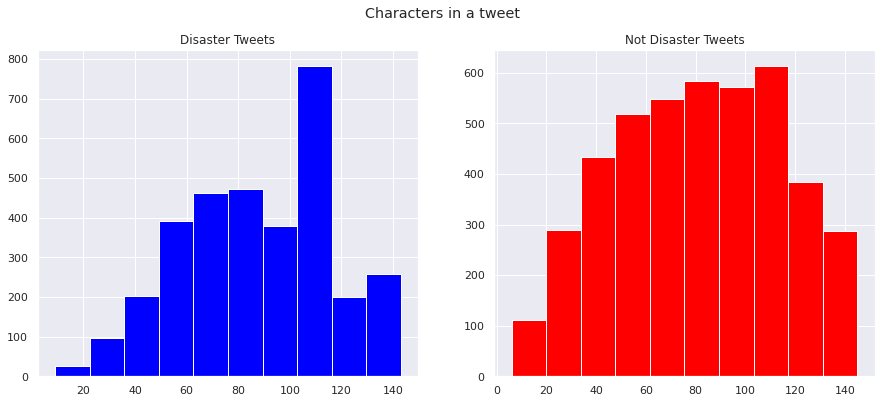

In [ ]:
sns.set()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
realTweetsLen = trainDF[trainDF['target'] == 1]['text'].str.len()
ax1.hist(realTweetsLen,color='blue')
ax1.set_title('Disaster Tweets')
nRealTweetsLen = trainDF[trainDF['target'] == 0]['text'].str.len()
ax2.hist(nRealTweetsLen,color='red')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Characters in a tweet')
plt.show
plt.savefig('CharactersinTweets.pdf')
files.download('CharactersinTweets.pdf')

In [ ]:
trainDF["length"].mean()

101.03743596479706

In [ ]:
realTweetsLen.mean()

108.11342097217977

In [ ]:
nRealTweetsLen.mean()

95.70681713496084

The average characters in a tweet are 101. The average characters used in disaster tweets 108, whereas not disaster tweets use 95 characters.

##Number of words in a tweet

In [ ]:
trainDF['count'] = trainDF[trainDF['target'] == 1]['text'].str.split().str.len()
trainDF

,id,keyword,location,text,target,length,count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16.0
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11.0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20.0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8.0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19.0


<function matplotlib.pyplot.show>

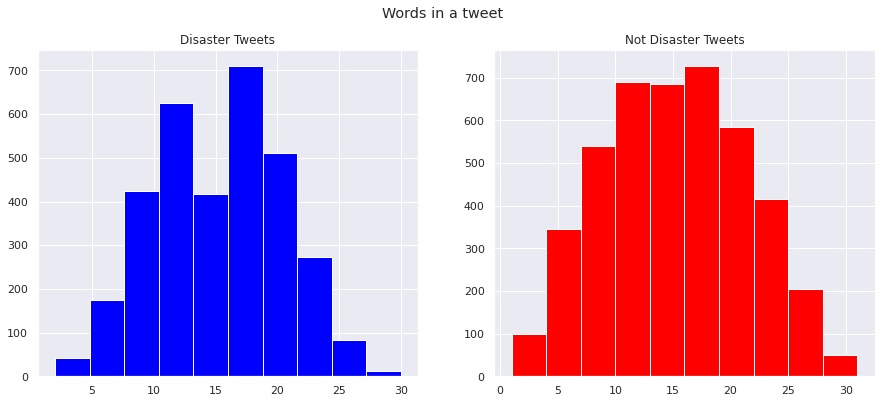

In [ ]:
sns.set()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
realTweetsWords = trainDF[trainDF['target'] == 1]['count']
ax1.hist(realTweetsWords,color='blue')
ax1.set_title('Disaster Tweets')
nRealTweetsWords = trainDF[trainDF['target'] == 0]['text'].str.split().str.len()
ax2.hist(nRealTweetsWords,color='red')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Words in a tweet')
plt.show

##Average word length in tweets

In [ ]:
trainDF[trainDF['target'] == 1]['text'].str.split()

0       [Our, Deeds, are, the, Reason, of, this, #eart...
1          [Forest, fire, near, La, Ronge, Sask., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive, #wildfires, evacuati...
4       [Just, got, sent, this, photo, from, Ruby, #Al...
                              ...                        
7608    [Two, giant, cranes, holding, a, bridge, colla...
7609    [@aria_ahrary, @TheTawniest, The, out, of, con...
7610    [M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...
7611    [Police, investigating, after, an, e-bike, col...
7612    [The, Latest:, More, Homes, Razed, by, Norther...
Name: text, Length: 3271, dtype: object

Text(0.5, 0.98, 'Average length of words in tweets')

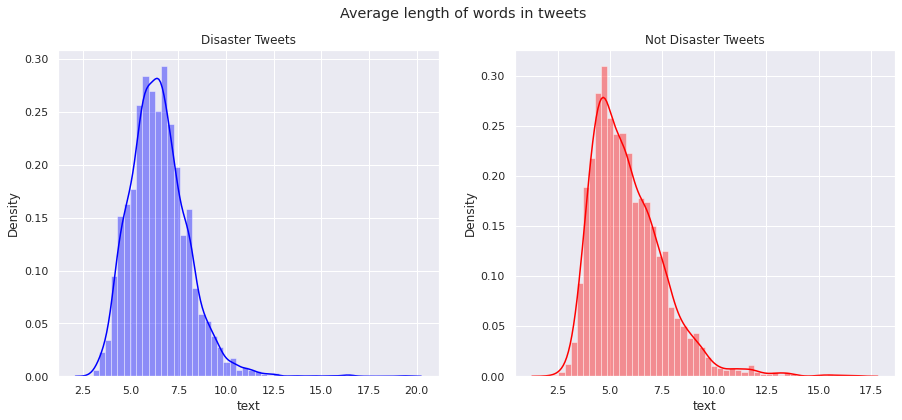

In [ ]:
sns.set()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word = trainDF[trainDF['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Disaster Tweets')

word = trainDF[trainDF['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Average length of words in tweets')

##Common stopwords in tweets

Stopwords are words in the English language that do not add much meaning to the sentence. The meaning of the sentence will remain the same if these words are removed.

In [ ]:
def createCorpus(target):
  corpus = []

  for x in trainDF[trainDF['target'] == target]['text'].str.split():
    for i in x:
      corpus.append(i)
  return corpus

### Analyze tweet which have target = 0 (not a disaster)

In [ ]:
corpus = createCorpus(0)

dictionary = defaultdict(int)

for word in corpus:
  if word in stopWord:
    dictionary[word] = dictionary[word] + 1

top=sorted(dictionary.items(), key=lambda x:x[1],reverse=True)[:10]

In [ ]:
np.array(stopWord)

array({'your', 'both', 'being', 'be', 'couldn', 'you', 'any', 'hasn', 'him', 'who', 'doesn', 'ourselves', 'a', 'same', 'which', 'do', 'against', 'will', 'above', 'off', 'haven', 'ma', 'wasn', 's', 'each', 'my', 'them', 'at', 'under', "haven't", 'didn', "isn't", 'up', 'on', "hasn't", 'mightn', 'll', 'just', 'here', 'when', 'has', 'does', "should've", 'down', 'so', 'did', 'wouldn', 'he', 'we', 'in', 'shan', 'after', "couldn't", 'between', 'hadn', 'his', "you'll", 've', "she's", "that'll", 'these', 'out', "you've", 'until', 'y', 'their', 'into', 'for', "you're", "aren't", 'not', 'it', "don't", 'now', "you'd", 'during', 'yours', 'as', 'the', "hadn't", 'once', 'yourself', 'mustn', 'with', 'ours', 'before', "won't", 'if', 'of', 'herself', 'only', 'me', 're', 'yourselves', "wasn't", 'been', 'how', 'are', 'myself', 'don', 'what', 'by', 'its', 'over', 'whom', 'can', 'own', 'aren', 'have', 'am', 'then', "shan't", 'd', 'an', 'won', 'through', "didn't", 'all', 'below', 'she', 'than', 'why', 'few',

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

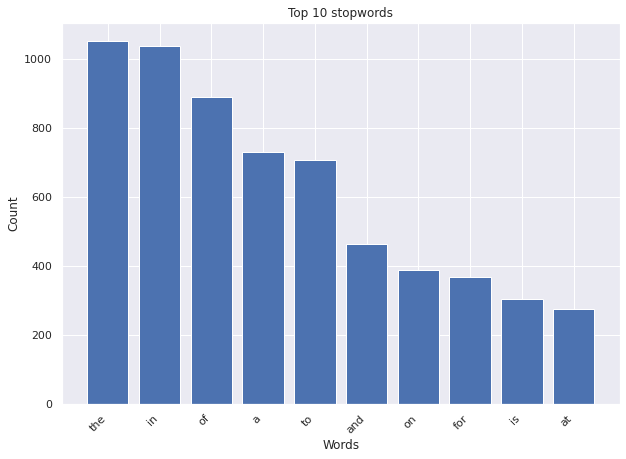

In [ ]:
# zip returns an iterator of tuples based on the iterable objects
sns.set()
plt.figure(figsize=(10,7))
x,y=zip(*top) 
plt.bar(x,y)
plt.title('Top 10 stopwords')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')
plt.xlabel('Words')
plt.savefig('StopWordsND.pdf')
files.download('StopWordsND.pdf')

###Analyze tweet which have target = 1 (Disaster)

In [ ]:
corpus = createCorpus(1)

dictionary = defaultdict(int)

for word in corpus:
  if word in stopWord:
    dictionary[word] = dictionary[word] + 1

top=sorted(dictionary.items(), key=lambda x:x[1],reverse=True)[:10]

In [ ]:
np.array(stopWord)

array({'your', 'both', 'being', 'be', 'couldn', 'you', 'any', 'hasn', 'him', 'who', 'doesn', 'ourselves', 'a', 'same', 'which', 'do', 'against', 'will', 'above', 'off', 'haven', 'ma', 'wasn', 's', 'each', 'my', 'them', 'at', 'under', "haven't", 'didn', "isn't", 'up', 'on', "hasn't", 'mightn', 'll', 'just', 'here', 'when', 'has', 'does', "should've", 'down', 'so', 'did', 'wouldn', 'he', 'we', 'in', 'shan', 'after', "couldn't", 'between', 'hadn', 'his', "you'll", 've', "she's", "that'll", 'these', 'out', "you've", 'until', 'y', 'their', 'into', 'for', "you're", "aren't", 'not', 'it', "don't", 'now', "you'd", 'during', 'yours', 'as', 'the', "hadn't", 'once', 'yourself', 'mustn', 'with', 'ours', 'before', "won't", 'if', 'of', 'herself', 'only', 'me', 're', 'yourselves', "wasn't", 'been', 'how', 'are', 'myself', 'don', 'what', 'by', 'its', 'over', 'whom', 'can', 'own', 'aren', 'have', 'am', 'then', "shan't", 'd', 'an', 'won', 'through', "didn't", 'all', 'below', 'she', 'than', 'why', 'few',

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

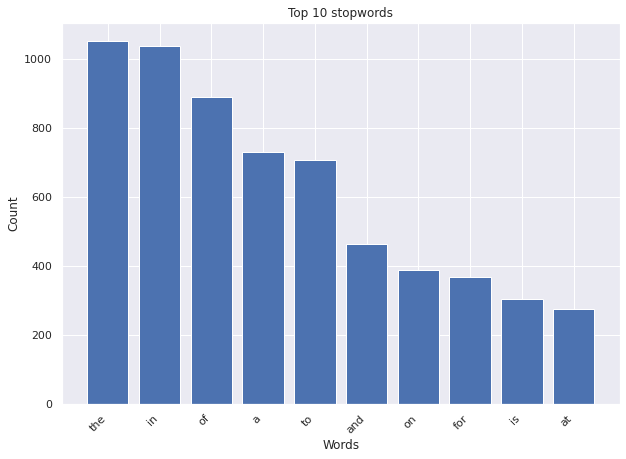

In [ ]:
# zip returns an iterator of tuples based on the iterable objects
sns.set()
plt.figure(figsize=(10,7))
x,y=zip(*top) 
plt.bar(x,y)
plt.title('Top 10 stopwords')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')
plt.xlabel('Words')
plt.savefig('StopWordsD.pdf')
files.download('StopWordsD.pdf')

##Overall common words 

In [ ]:
count = Counter(corpus)
most=count.most_common()
x = []
y = []

for word,count in most[:50]:
  if (word not in stopWord):
    x.append(word)
    y.append(count)

Text(0.5, 1.0, 'Common words used before cleaning')

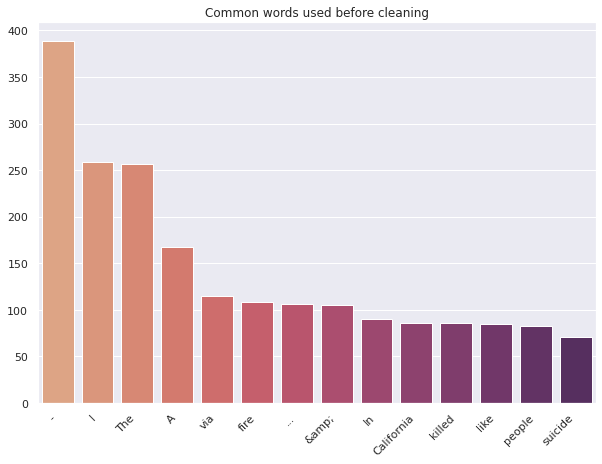

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x,y ,palette= "flare")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Common words used before cleaning')

##N-gram Analysis of tweets

###Unigram

In [ ]:
def getTopTweetUnigram(corpus, n = None):
  vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

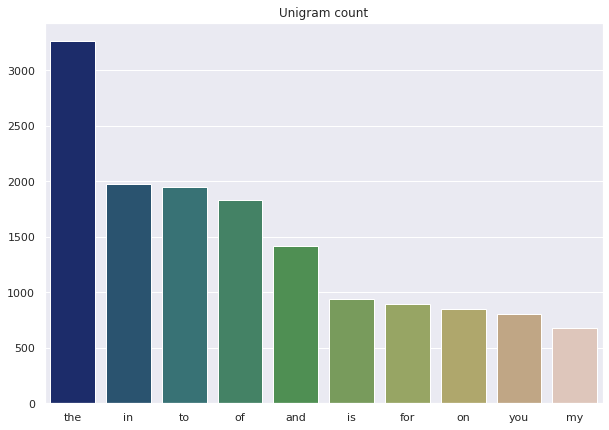

In [ ]:
topTweetUnigram = getTopTweetUnigram(trainDF['text'])[:10]
x,y = map(list, zip(*topTweetUnigram))
sns.set()
plt.figure(figsize=(10,7))
sns.barplot(x,y,palette="gist_earth")
plt.title('Unigram count')
plt.savefig('Unigram.pdf')
files.download('Unigram.pdf')

###Bigram

In [ ]:
def getTopTweetBigram(corpus, n = None):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

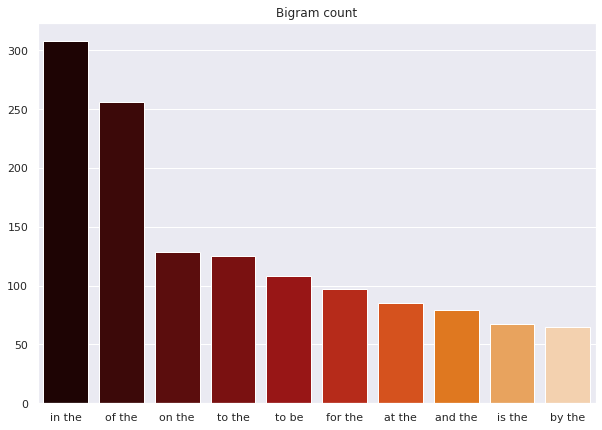

In [ ]:
topTweetBigram = getTopTweetBigram(trainDF['text'])[:10]
x,y = map(list, zip(*topTweetBigram))
sns.set()
plt.figure(figsize=(10,7))
sns.barplot(x,y,palette="gist_heat")
plt.title('Bigram count')
plt.savefig('Bigram.pdf')
files.download('Bigram.pdf')

###Trigram

In [ ]:
def getTopTweetTrigram(corpus, n = None):
  vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

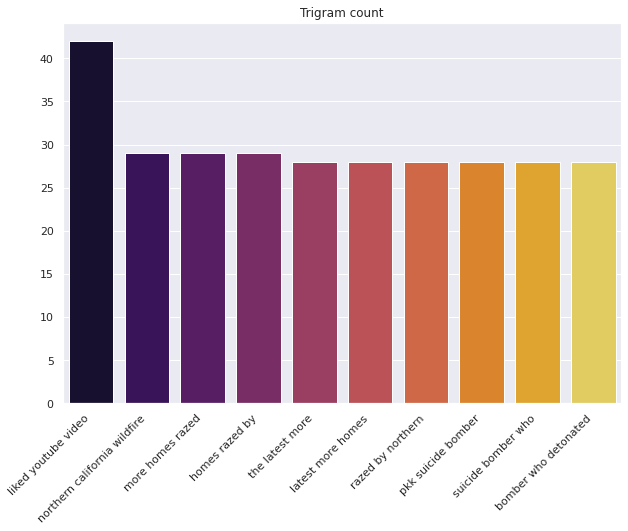

In [ ]:
topTweetTrigram = getTopTweetTrigram(trainDF['text'])[:10]
x,y = map(list, zip(*topTweetTrigram))
sns.set()
plt.figure(figsize=(10,7))
sns.barplot(x,y,palette="inferno")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Trigram count')
plt.savefig('Trigram.pdf')
files.download('Trigram.pdf')

As we can see, the tweets we have in the dataset need a lot of cleaning. 

##Location of tweets

Text(0.5, 0, 'Country/Location')

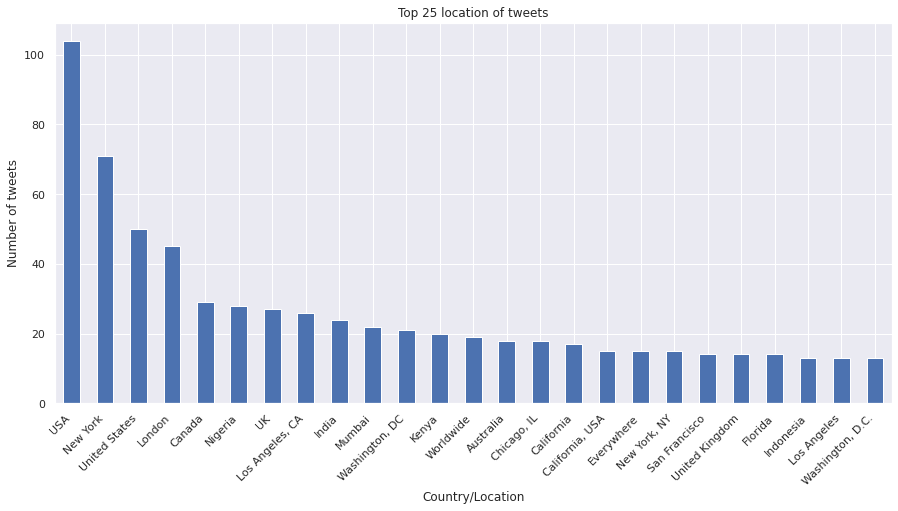

In [ ]:
sns.set()
pd.options.plotting.backend = "matplotlib"
axL = trainDF['location'].value_counts()[:25].plot(kind = 'bar', figsize = (15,7), title = 'Top 25 location of tweets')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Number of tweets')
plt.xlabel('Country/Location')

#Data cleaning

Before we head to modelling our data, we need to clean it. We will correct things like punctuation, spelling corrections, removing emojis, etc. 

###Remove html links

In [ ]:
trainDF['text'].str.find('http')

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
7608    61
7609    -1
7610    43
7611    -1
7612    72
Name: text, Length: 7613, dtype: int64

As we can see, we do have some values that are not equal to -1. That means that http does occur in the twwets. To back us up on this statement, we can check the n-gram graphs which show that http occurs in the tweets. Let's remove that from the the training data set.

In [ ]:
def removeURL(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'',text)

In [ ]:
trainDF['text']=trainDF['text'].apply(lambda x : removeURL(x))
trainDF['text'].str.find('http')

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7608   -1
7609   -1
7610   -1
7611   -1
7612   -1
Name: text, Length: 7613, dtype: int64

As we can see, http is no longer a part of the tweets.

###Remove html tags

In [ ]:
def removeHTML(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'',text)

In [ ]:
trainDF['text']=trainDF['text'].apply(lambda x : removeHTML(x))
trainDF['text'].str.find('<.*?')

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7608   -1
7609   -1
7610   -1
7611   -1
7612   -1
Name: text, Length: 7613, dtype: int64

###Remove Emojis

In [ ]:
def removeEmoji(text):
  emoji = re.compile("["
  u"\U0001F600-\U0001F64F"  # emoticons
  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
  u"\U0001F680-\U0001F6FF"  # transport & map symbols
  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  "]+", flags=re.UNICODE)
  return emoji.sub(r'', text)

In [ ]:
trainDF['text']=trainDF['text'].apply(lambda x : removeEmoji(x))
trainDF['text'].str.find('😔')

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7608   -1
7609   -1
7610   -1
7611   -1
7612   -1
Name: text, Length: 7613, dtype: int64

###Remove punctuation

In [ ]:
def removePunctuation(text):
  table=str.maketrans('','',string.punctuation)
  return text.translate(table)


In [ ]:
trainDF['text']=trainDF['text'].apply(lambda x : removePunctuation(x))
trainDF['text'].str.find('!')

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7608   -1
7609   -1
7610   -1
7611   -1
7612   -1
Name: text, Length: 7613, dtype: int64

##Word Cloud

After cleaning the data, lets see which words occur the most.

###Not Disaster Tweets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

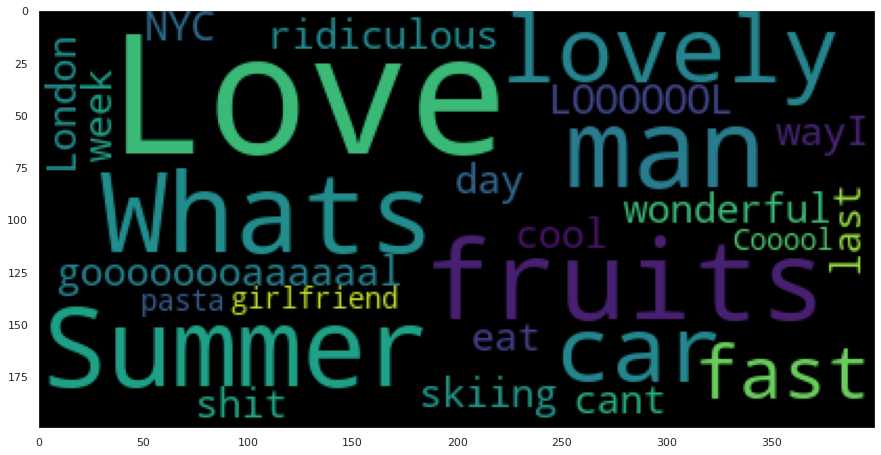

In [ ]:
corpus = createCorpus(0)

word_cloud = WordCloud(
    background_color='black',
    max_font_size = 80
    ).generate(" ".join(corpus[:50]))

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.grid(b=None)
plt.savefig('WordCloudND.pdf')
files.download('WordCloudND.pdf')

###Disaster tweets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

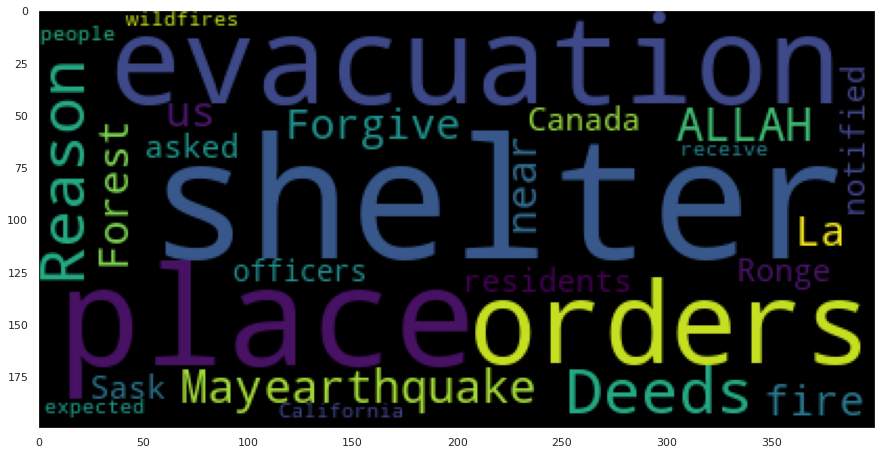

In [ ]:
corpus = createCorpus(1)

word_cloud = WordCloud(
    background_color='black',
    max_font_size = 80
    ).generate(" ".join(corpus[:50]))

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.grid(b=None)
plt.savefig('WordCloudD.pdf')
files.download('WordCloudD.pdf')

#BERT using TensorFlow Hub

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 9.2MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

nltk.download('punkt')

import tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def bertEncode(texts, tokenizer, max_len=512):
  allTokens = []
  allMasks = []
  allSegments = []
    
  for text in texts:
    text = tokenizer.tokenize(text)
            
    text = text[:max_len-2]
    inputSequence = ["[CLS]"] + text + ["[SEP]"]
    padLen = max_len - len(inputSequence)
        
    tokens = tokenizer.convert_tokens_to_ids(inputSequence)
    tokens = tokens + [0] * padLen
    padMasks = [1] * len(inputSequence) + [0] * padLen
    segmentIDS = [0] * max_len
        
    allTokens.append(tokens)
    allMasks.append(padMasks)
    allSegments.append(segmentIDS)
    
  return np.array(allTokens), np.array(allMasks), np.array(allSegments)

In [ ]:
def buildModel(bertLayer, max_len=512):

  inputWordIDS = Input(shape=(max_len,), dtype=tf.int32, name="inputWordIDS")
  inputMask = Input(shape=(max_len,), dtype=tf.int32, name="inputMask")
  segmentIDS = Input(shape=(max_len,), dtype=tf.int32, name="segmentIDS")

  _, sequenceOutput = bertLayer([inputWordIDS, inputMask, segmentIDS])
  clfOutput = sequenceOutput[:, 0, :]

  if Dropout_num == 0:
    #No dropout
    out = Dense(1, activation='sigmoid')(clfOutput)

  else:
    #Dropout
    x = Dropout(Dropout_num)(clfOutput)
    out = Dense(1, activation='sigmoid')(x)
  
  model = Model(inputs=[inputWordIDS, inputMask, segmentIDS], outputs=out)
  model.compile(Adam(lr=learningRate), loss='binary_crossentropy', metrics=['accuracy'])

  return model


##Data cleaning for BERT

###Clean non-ASCII characters

In [ ]:
def cleanTextNA(text):
  #return ''.join([i if ord(i) < 128 else '' for i in text])
  return''.join([x for x in text if x in string.printable])

### Remove punctuation

We need to clean the data even further than what we did earlier.

In [ ]:
def removePunctuationBERT(text):
  punctuationBERT = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"

  for p in punctuationBERT:
    text = text.replace(p, f' {p} ')

  text = text.replace('...', ' ... ')

  if '...' not in text:
    text = text.replace('..', ' ... ')

  return text

###Converting abbreviations

For BERT, we need to convert all the abbreviations to known words so that we can classify the tweets correctly.

In [ ]:
abbrev = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

We now need to convert text to lower case so that we can use the uncased model of BERT.

In [ ]:
def converterAbbrev(word):
  word = word.lower()
  if word in abbrev.keys():
    return abbrev[word]
  
  else:
    return word

In [ ]:
def convertAbbrevText(text):
  tokens = word_tokenize(text)
  tokens = [converterAbbrev(word) for word in tokens]
  text = ' '.join(tokens)
  return text

##Load BERT from TF Hub

In [ ]:
moduleURL = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bertLayer = hub.KerasLayer(moduleURL, trainable=True)

##Implement data cleaning

In [ ]:
#Clean the data for BERT
train["text"] = train["text"].apply(lambda x: cleanTextNA(x))
train["text"] = train["text"].apply(lambda x: removeURL(x))
train["text"] = train["text"].apply(lambda x: removeHTML(x))
train["text"] = train["text"].apply(lambda x: removeEmoji(x))
train["text"] = train["text"].apply(lambda x: removePunctuationBERT(x))
train["text"] = train["text"].apply(lambda x: convertAbbrevText(x))

test["text"] = test["text"].apply(lambda x: cleanTextNA(x))
test["text"] = test["text"].apply(lambda x: removeURL(x))
test["text"] = test["text"].apply(lambda x: removeHTML(x))
test["text"] = test["text"].apply(lambda x: removeEmoji(x))
test["text"] = test["text"].apply(lambda x: removePunctuationBERT(x))
test["text"] = test["text"].apply(lambda x: convertAbbrevText(x))

##Build and train BERT

In [ ]:
#Load BERT's tokenizer
vocabFile = bertLayer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bertLayer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocabFile, do_lower_case)

In [ ]:
#Encode into tokens, masks, and segment
trainInput = bertEncode(train.text.values, tokenizer, max_len=160)
testInput = bertEncode(test.text.values, tokenizer, max_len=160)
trainLabels = train.target.values

In [ ]:
#random_state_split = 2
Dropout_num = 0
learningRate = 6e-6
valid = 0.15
epochsNum = 5
batchSizeNum = 16

In [ ]:
#Build BERT
modelBERT = buildModel(bertLayer, max_len=160)
modelBERT.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputWordIDS (InputLayer)       [(None, 160)]        0                                            
__________________________________________________________________________________________________
inputMask (InputLayer)          [(None, 160)]        0                                            
__________________________________________________________________________________________________
segmentIDS (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   inputWordIDS[0][0]               
                                                                 inputMask[0][0]       

##Train BERT

In [ ]:
checkpointBERT = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)

history = modelBERT.fit(
    trainInput, trainLabels,
    validation_split = valid,
    epochs = epochsNum,
    callbacks=[checkpointBERT],
    batch_size = batchSizeNum
)

Epoch 1/5
405/405 [==============================] - 775s 2s/step - loss: 0.4362 - accuracy: 0.8112 - val_loss: 0.4005 - val_accuracy: 0.8336
Epoch 2/5
405/405 [==============================] - 705s 2s/step - loss: 0.2838 - accuracy: 0.8850 - val_loss: 0.4767 - val_accuracy: 0.8310
Epoch 3/5
405/405 [==============================] - 704s 2s/step - loss: 0.1729 - accuracy: 0.9312 - val_loss: 0.5157 - val_accuracy: 0.8231
Epoch 4/5
405/405 [==============================] - 704s 2s/step - loss: 0.0867 - accuracy: 0.9677 - val_loss: 0.6066 - val_accuracy: 0.8187
Epoch 5/5
405/405 [==============================] - 705s 2s/step - loss: 0.0589 - accuracy: 0.9773 - val_loss: 0.7243 - val_accuracy: 0.8222


##Prediction using BERT

In [ ]:
modelBERT.load_weights('model_BERT.h5')
testPredBERT = modelBERT.predict(testInput)
testPredBERTint = testPredBERT.round().astype('int')

##Confusion Matrix

In [ ]:
trainPredBERT = modelBERT.predict(trainInput)
trainPredBERTint = trainPredBERT.round().astype('int')

Text(0.5, 1.0, 'Confusion Matrix for BERT Model')

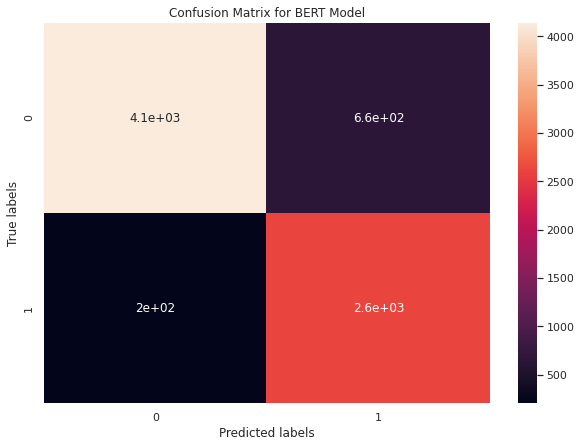

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
cm = confusion_matrix(trainPredBERTint, train['target'].values)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
plt.title("Confusion Matrix for BERT Model")


It is hard to understand what the confusion matrix is tryint to tell us. Let's work on the matrix to get a descriptive graph.

In [ ]:
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
  cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_perc = cm / cm_sum.astype(float) * 100
  annot = np.empty_like(cm).astype(str)
  nrows, ncols = cm.shape
  for i in range(nrows):
    for j in range(ncols):
      c = cm[i, j]
      p = cm_perc[i, j]
      if i == j:
        s = cm_sum[i]
        annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
      elif c == 0:
        annot[i, j] = ''
      else:
        annot[i, j] = '%.1f%%\n%d' % (p, c)
  cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
  cm.index.name = 'Actual'
  cm.columns.name = 'Predicted'
  fig, ax = plt.subplots(figsize=figsize)
  plt.title(title)
  sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

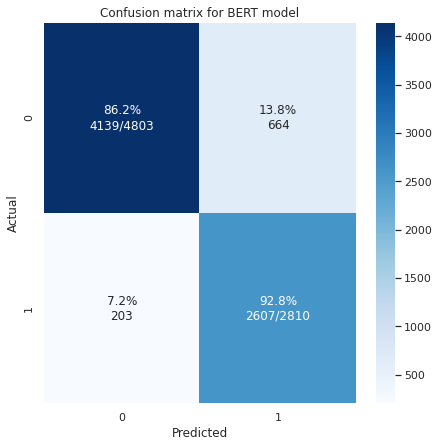

In [ ]:
plot_cm(trainPredBERTint, train['target'].values, 'Confusion matrix for BERT model', figsize=(7,7))
plt.savefig('CM.pdf')
files.download('CM.pdf')

#References

1. https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert#NLP:

2. https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

3. https://stackoverflow.com/questions/12761510/python-how-can-i-calculate-the-average-word-length-in-a-sentence-using-the-spl

4. https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

5. https://medium.com/mti-technology/n-gram-language-models-b125b9b62e58

6. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

7. https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python

8. https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

9. https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

10. https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub#Model:-Build,-Train,-Predict,-Submit

11. https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22

12. https://www.kaggle.com/rftexas/text-only-kfold-bert

13. https://www.kaggle.com/wrrosa/keras-bert-using-tfhub-modified-train-data 

14. https://stackoverflow.com/questions/20078816/replace-non-ascii-characters-with-a-single-space/39059279